In [17]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.head()
new_columns = ['Package','Month','Date','Low Price', 'High Price']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

In [18]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package':pumpkins['Package'],'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

<AxesSubplot:xlabel='Month'>

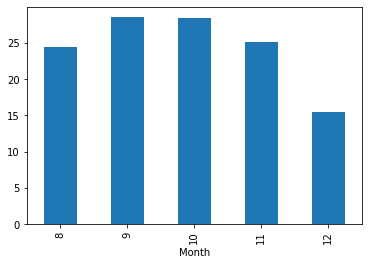

In [21]:
import matplotlib.pyplot as plt
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')